## This notebook imputes synthetic data

This notebook removes random data from the synthetic data sets and imputes them using the methods available in the imputationLibrary available at https://github.com/silvanaribeiro/imputationLibrary .

In [6]:
from imputationLibrary import forwardFilling, randomSampleImputation, meanImputation, movingAverage, splineInterpolation
from imputationLibrary.util import util
import pandas as pd
from sklearn.metrics import mean_squared_error
import warnings
import random
import numpy as np
warnings.filterwarnings('ignore')

TRAINING_SIZE = 749
TESTING_SIZE=250

files = ['seasonal_and_trend', 'seasonal', 'trend', 'white_noise']

In [7]:
def remove_random_points(df_input, num_missing=200):
    df = df_input.copy()
    missing_places = random.sample(range(df.shape[0]), num_missing)
    for missing_place in missing_places:
        df.iloc[missing_place] = np.nan
    return df

Imputing File  seasonal_and_trend
Forward Filling Imputation


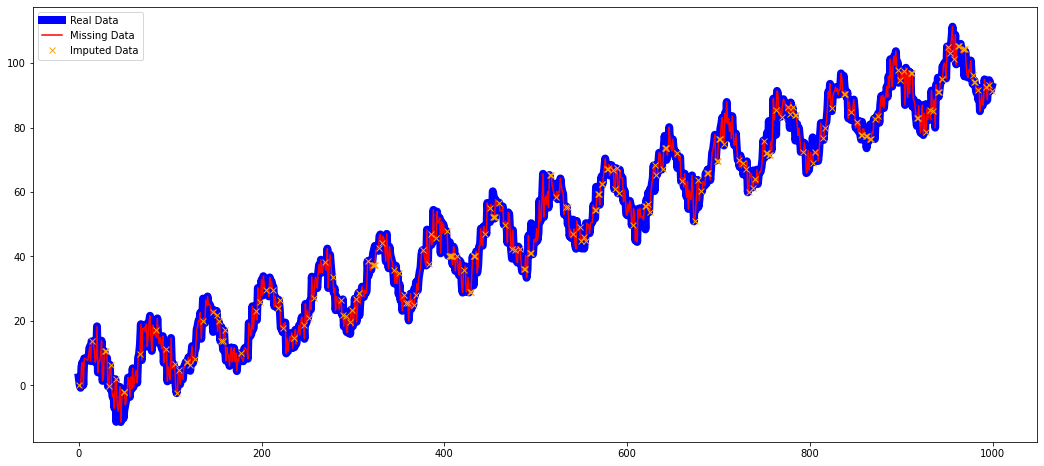

_______________________________________________________________________________________________________________
Random Sample Imputation


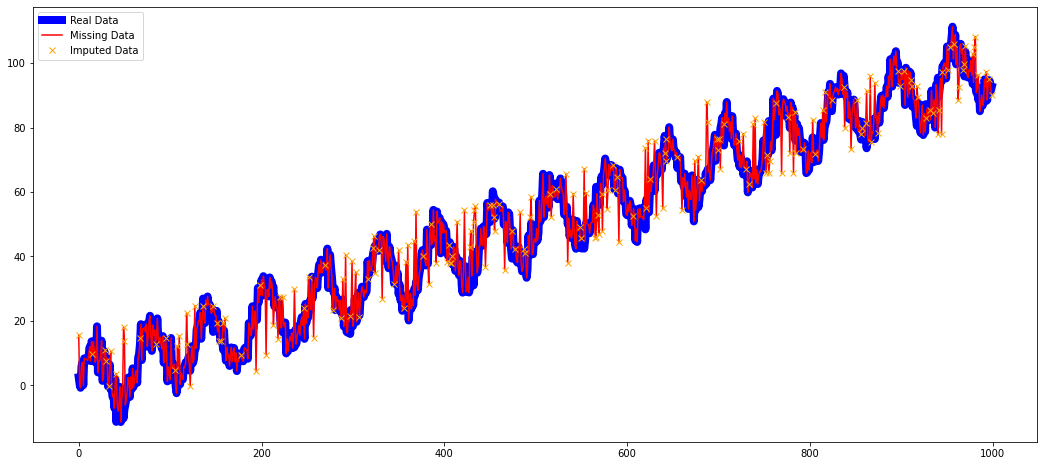

_______________________________________________________________________________________________________________
Mean Imputation


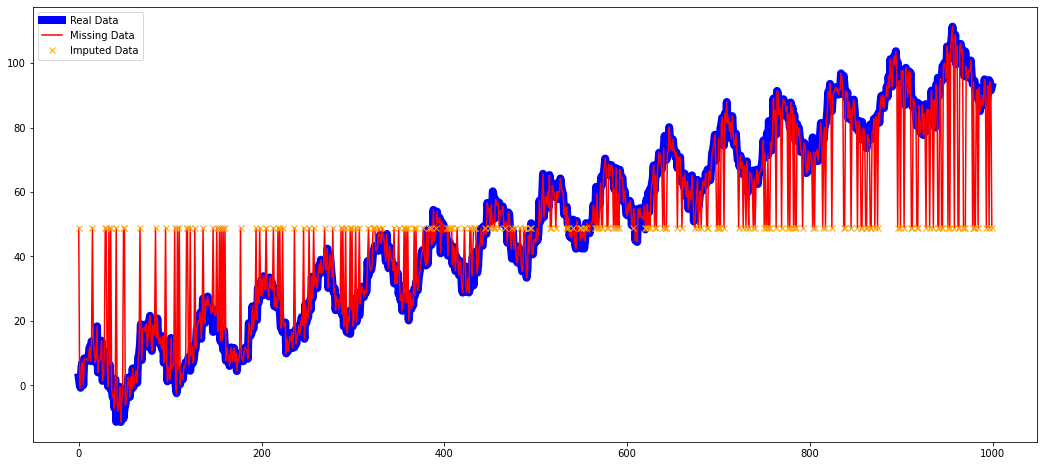

_______________________________________________________________________________________________________________
Spline Interpolation Imputation


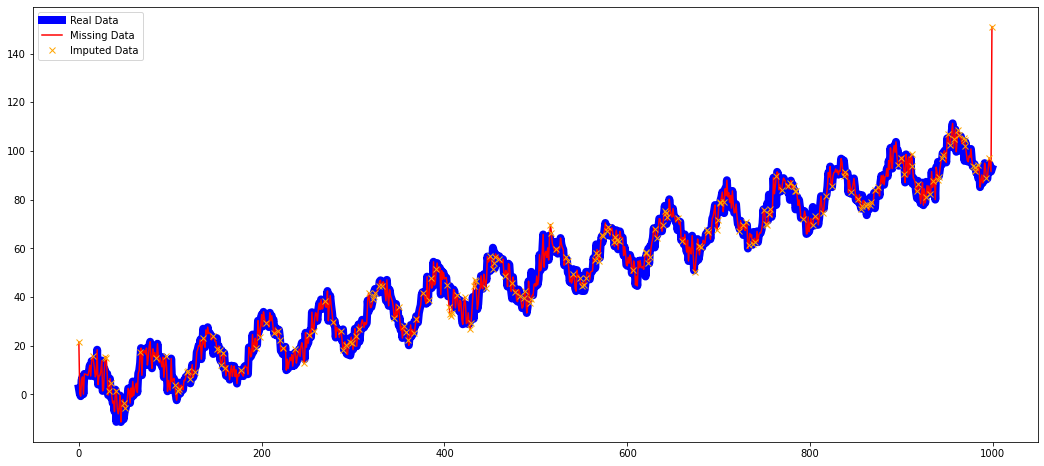

_______________________________________________________________________________________________________________
[171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097, 171.02003821687097]
###############################################################################################################
Imputing File  seasonal
Forward Filling Imputation


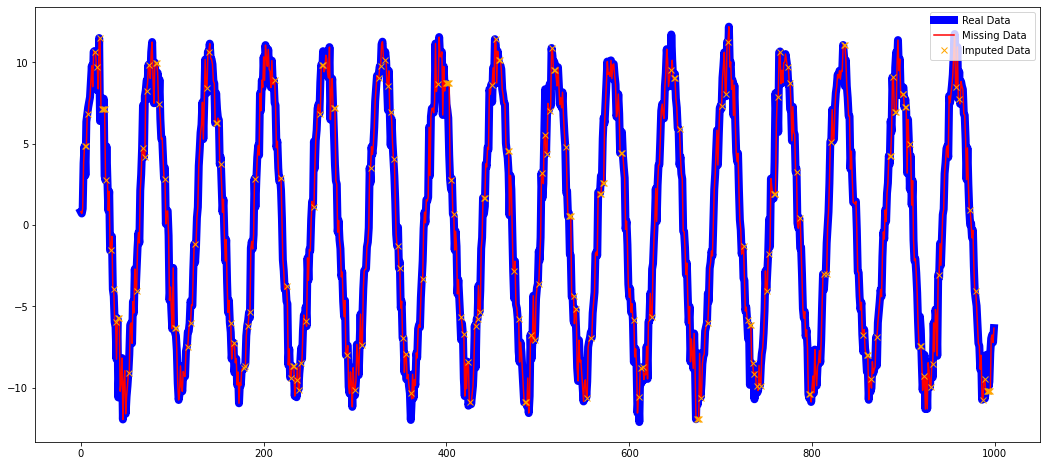

_______________________________________________________________________________________________________________
Random Sample Imputation


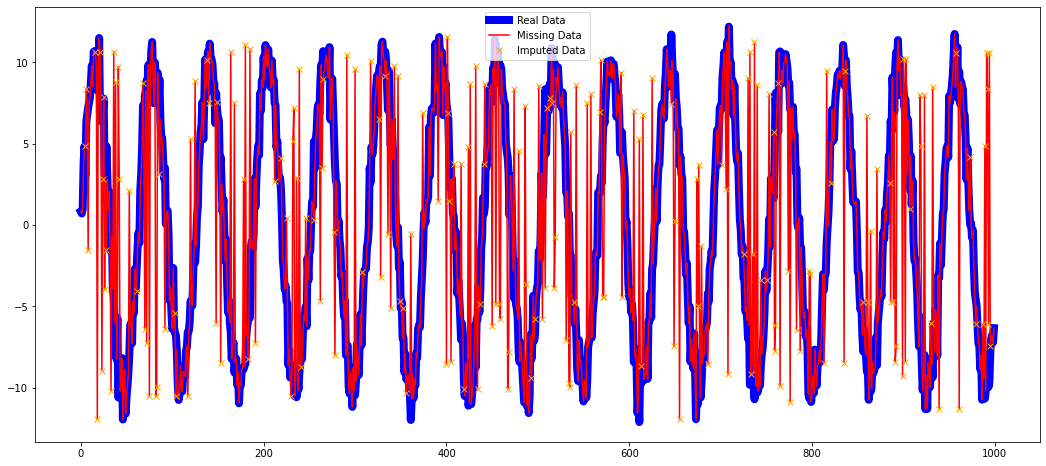

_______________________________________________________________________________________________________________
Mean Imputation


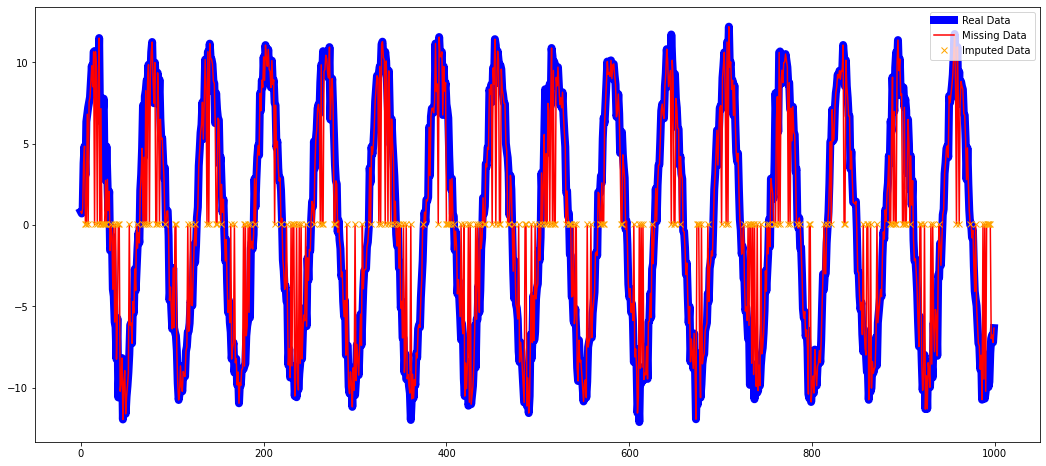

_______________________________________________________________________________________________________________
Spline Interpolation Imputation


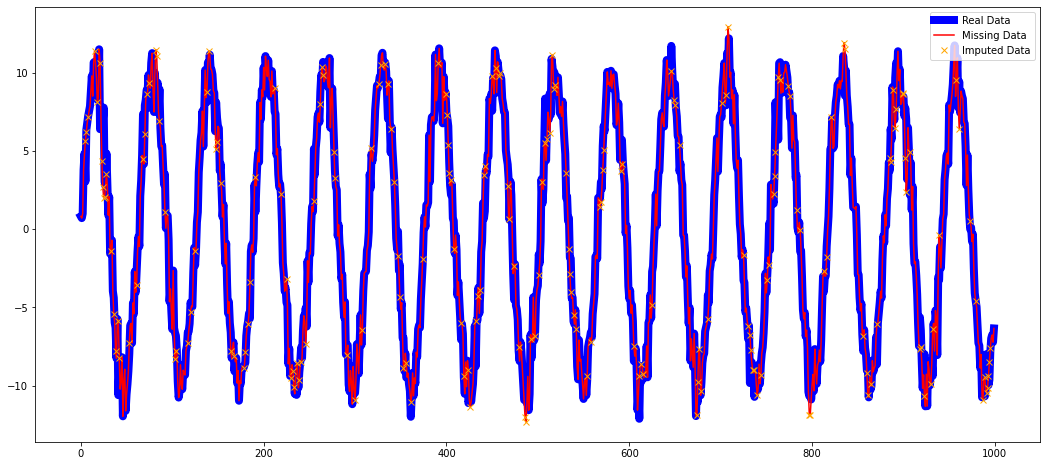

_______________________________________________________________________________________________________________
[11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477, 11.288932699609477]
###############################################################################################################
Imputing File  trend
Forward Filling Imputation


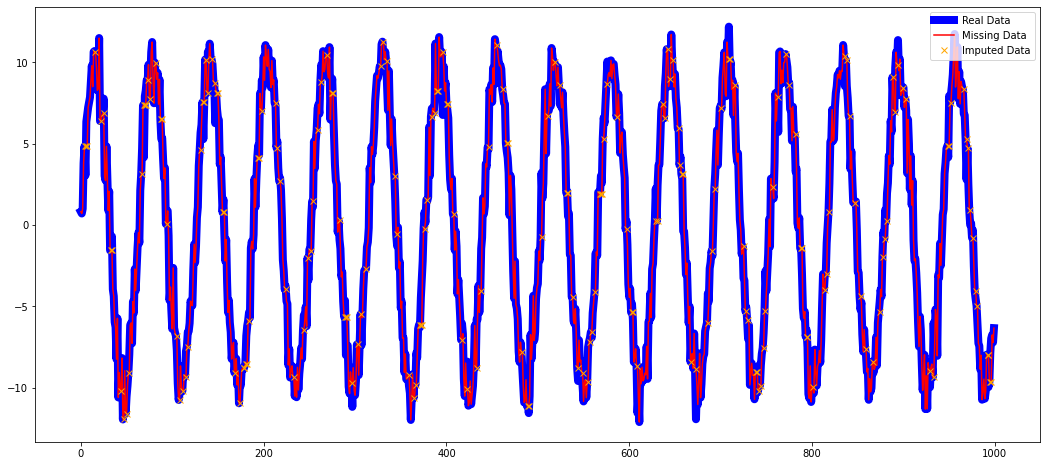

_______________________________________________________________________________________________________________
Random Sample Imputation


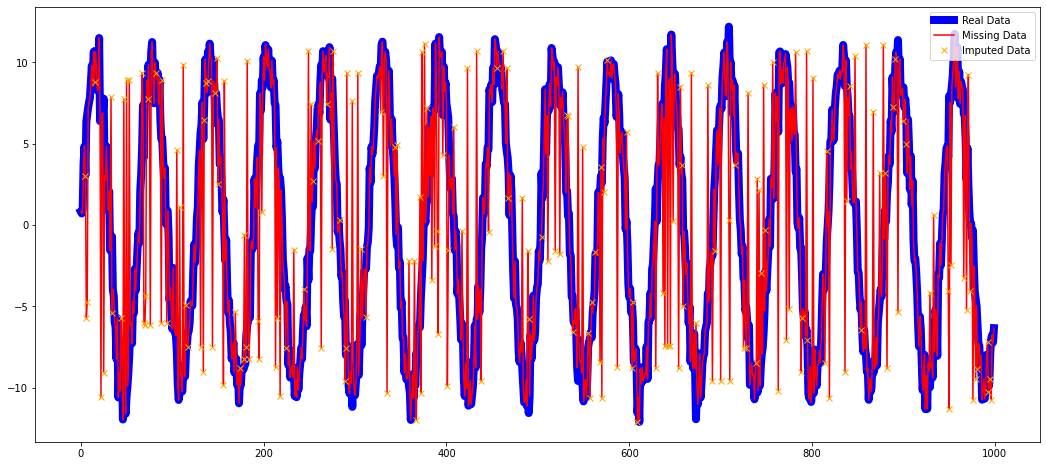

_______________________________________________________________________________________________________________
Mean Imputation


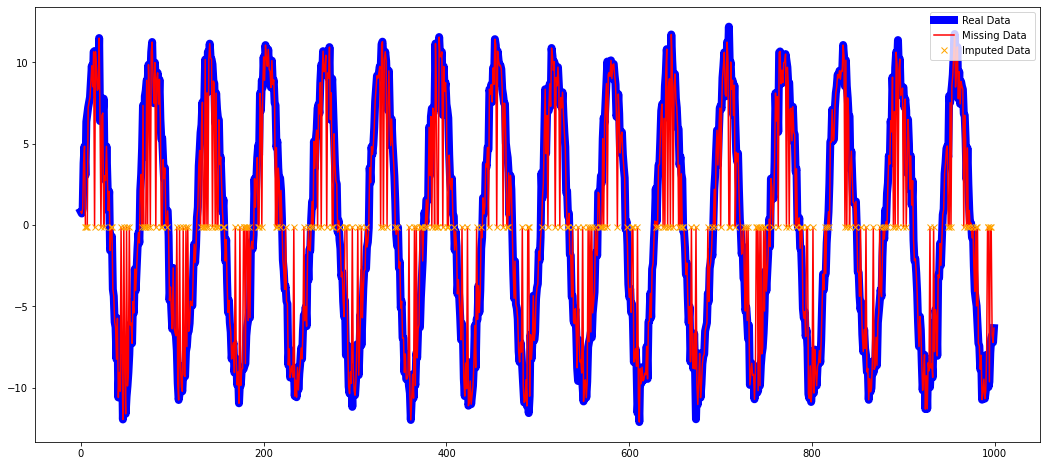

_______________________________________________________________________________________________________________
Spline Interpolation Imputation


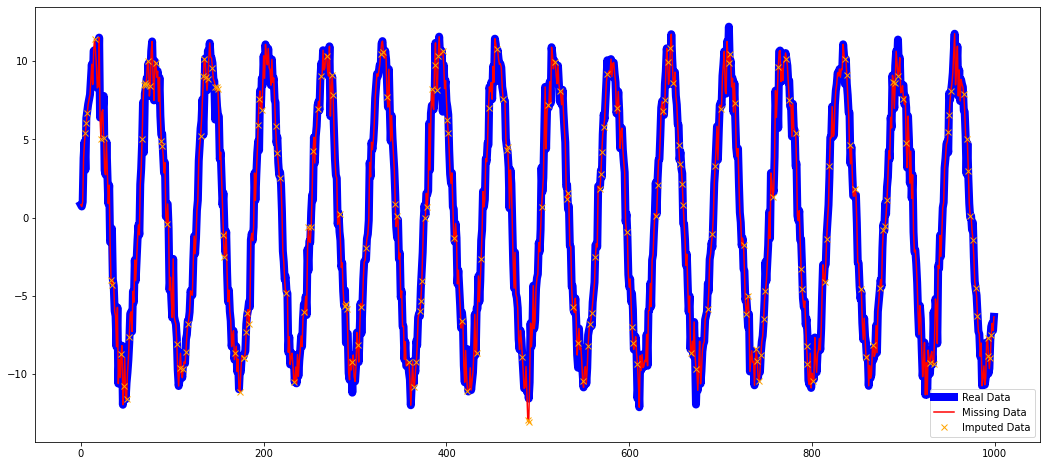

_______________________________________________________________________________________________________________
[9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048, 9.716547299942048]
###############################################################################################################
Imputing File  white_noise
Forward Filling Imputation


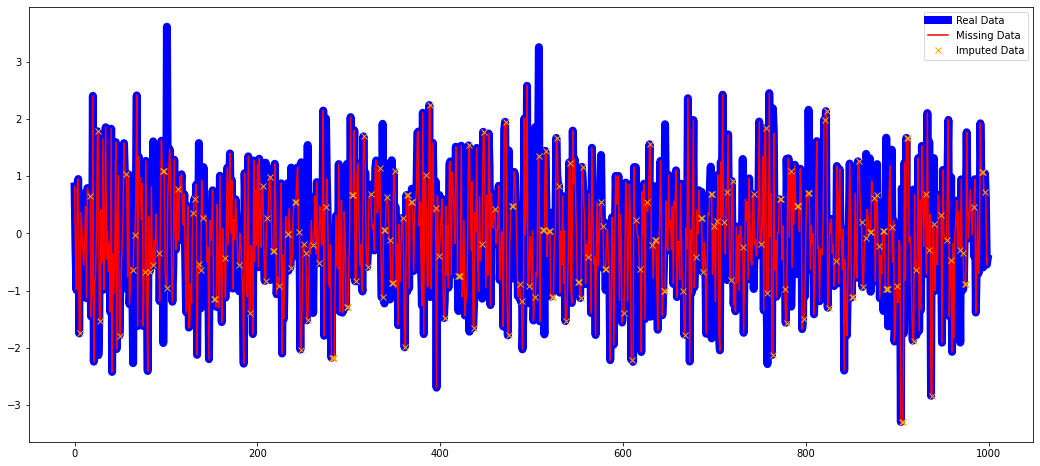

_______________________________________________________________________________________________________________
Random Sample Imputation


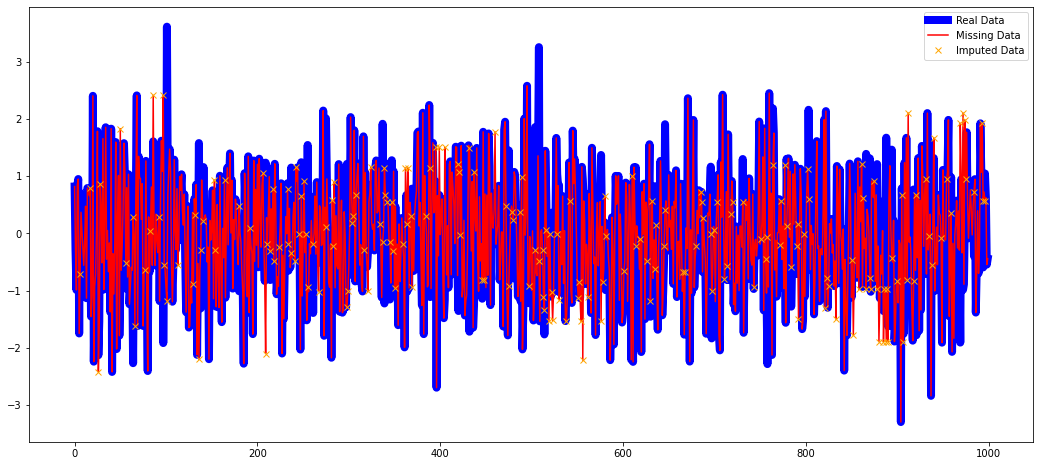

_______________________________________________________________________________________________________________
Mean Imputation


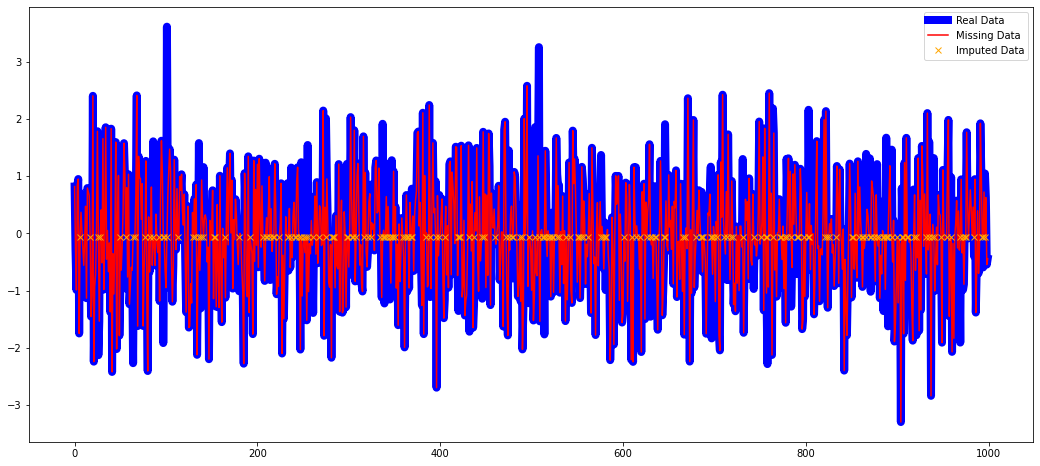

_______________________________________________________________________________________________________________
Spline Interpolation Imputation


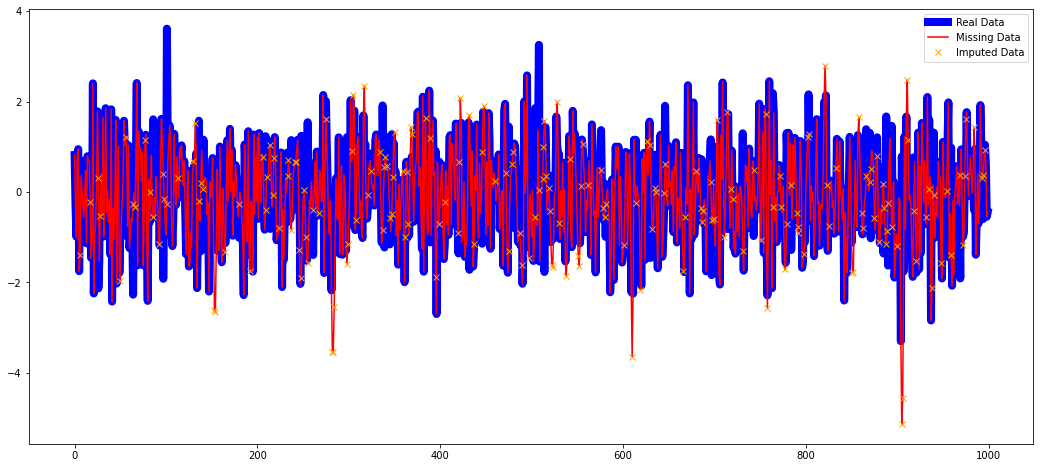

_______________________________________________________________________________________________________________
[0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853, 0.21330916334183853]
###############################################################################################################
{'seasonal_and_trend_mean_ff': 3.6746979382509535, 'seasonal_and_trend_std_ff': 8.881784197001252e-16, 'seasonal_and_trend_mean_rs': 23.616425476

In [8]:
REPETE = 30
dict_rmse = {}
for file in files:
    list_ff = []
    list_rs = []
    list_mi = []
    list_si = []
    df_complete = pd.read_csv('output\/'+ file + '_complete.csv', index_col=0)
    df_missing = remove_random_points(df_complete, num_missing=200)
    
    for count in range(REPETE): 
        if count == 0:
            print("Imputing File ", file)

        ##############################################################################################################
        imputed_ff = forwardFilling.inputTrainingData(df_missing)
        list_ff.append(mean_squared_error(imputed_ff, df_complete, squared=True))
        if count == 0:
            print("Forward Filling Imputation")
            util.plot(df_complete, df_missing, imputed_ff) 
            print("_______________________________________________________________________________________________________________")
        elif count == REPETE-1:
            dict_rmse[file+'_mean_ff'] = np.mean(list_ff)
            dict_rmse[file+'_std_ff'] = np.std(list_ff)
        
        ##############################################################################################################
        for count2 in range(REPETE):
            imputed_rs = randomSampleImputation.inputTrainingData(df_missing, sliding_window_size = 0.03)
            list_rs.append(mean_squared_error(imputed_rs, df_complete, squared=True))
            if count == 0 and count2 == 0:
                print("Random Sample Imputation")
                util.plot(df_complete, df_missing, imputed_rs) 
                print("_______________________________________________________________________________________________________________")
            elif count == REPETE-1 and count2 == REPETE-1:
                dict_rmse[file+'_mean_rs'] = np.mean(list_rs)
                dict_rmse[file+'_std_rs'] = np.std(list_rs)      

        ##############################################################################################################
        imputed_mi = meanImputation.inputTrainingData(df_missing)
        list_mi.append(mean_squared_error(imputed_mi, df_complete, squared=True))
        if count == 0:
            print("Mean Imputation")
            util.plot(df_complete, df_missing, imputed_mi) 
            print("_______________________________________________________________________________________________________________")
        elif count == REPETE-1:
            print(list_mi)
            dict_rmse[file+'_mean_mi'] = np.mean(list_mi)
            dict_rmse[file+'_std_mi'] = np.std(list_mi)

            
        ##############################################################################################################
        for count2 in range(REPETE):
            imputed_si = splineInterpolation.inputTrainingData(df_missing, derivate_order=2)
            list_si.append(mean_squared_error(imputed_si, df_complete, squared=True))
            if count == 0 and count2 == 0:
                print("Spline Interpolation Imputation")
                util.plot(df_complete, df_missing, imputed_si) 
                print("_______________________________________________________________________________________________________________")
            elif count == REPETE-1 and count2 == REPETE-1:
                dict_rmse[file+'_mean_si'] = np.mean(list_si)
                dict_rmse[file+'_std_si'] = np.std(list_si)
            
    print("###############################################################################################################")
    
print(dict_rmse)    